In [1]:
#model part 
#read the data
import pandas as pd
data = pd.read_csv("/Users/weijiepan/Desktop/506_project_weight.csv")
data = data.drop(["Unnamed: 0"],axis=1)

In [2]:
#create intecept terms

colnames=["iron","calcium","zine","sodium","VE","VA","alcohol","VC",
     "fat","dietary fiber","sugar","carbohydrate","energy","protein"]
for i in colnames:
    data[i+"_ins"] = data[i]*data["insurance"]

In [3]:
#divide it into X(preditors) y(result)
X = data.drop(["id","diabetes","insurance"],axis=1)
y = data["diabetes"]

In [4]:
#deal with categorical features
#age, gender, income, insurance
gender = pd.get_dummies(X['gender'],drop_first=True)
gender.columns=["gender"+str(i) for i in gender.columns]

age = pd.get_dummies(X['age'],drop_first=True)
age.columns=["age"+str(i) for i in age.columns]

income = pd.get_dummies(X['income'],drop_first=True)
income.columns=["income"+str(i) for i in income.columns]

X.drop(['gender','age','income'],axis=1,inplace=True)

X = pd.concat([X,gender,age,income],axis=1)

In [5]:
#split it into training set and test set
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                                    test_size=0.3,
                                                                    random_state=42,
                                                                    stratify=y)

In [6]:
#build the model
from sklearn.metrics import accuracy_score 
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

model = LogisticRegressionCV(penalty='l1',scoring='roc_auc',solver="saga",
                             cv=10,class_weight="balanced",max_iter=1000)
model.fit(X_train,y_train)

/Users/weijiepan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/weijiepan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/weijiepan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/weijiepan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/weijiepan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarni

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='warn', n_jobs=None,
                     penalty='l1', random_state=None, refit=True,
                     scoring='roc_auc', solver='saga', tol=0.0001, verbose=0)

In [21]:
import matplotlib as plt

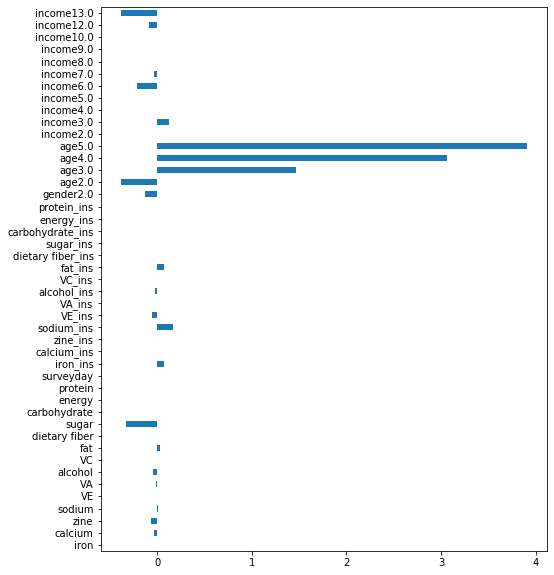

In [24]:
#display the coef 
coef = pd.Series(model.coef_[0,:], index = X_train.columns)
plt.rcParams['figure.figsize'] = (8.0, 10.0)
coef.plot(kind = "barh")

In [25]:
coef

iron                 0.000000
calcium             -0.034681
zine                -0.064689
sodium               0.012555
VE                   0.000000
VA                  -0.016067
alcohol             -0.041758
VC                   0.000000
fat                  0.032824
dietary fiber        0.000000
sugar               -0.332166
carbohydrate         0.000000
energy               0.000000
protein              0.000000
surveyday            0.000000
iron_ins             0.068384
calcium_ins          0.000000
zine_ins             0.000000
sodium_ins           0.172625
VE_ins              -0.053086
VA_ins               0.000000
alcohol_ins         -0.024737
VC_ins               0.000000
fat_ins              0.070475
dietary fiber_ins    0.000000
sugar_ins           -0.004278
carbohydrate_ins     0.000000
energy_ins           0.000000
protein_ins          0.000000
gender2.0           -0.125900
age2.0              -0.382535
age3.0               1.468714
age4.0               3.062177
age5.0    

In [26]:
roc_auc_score(y_test,model.predict(X_test))

0.78718699853783

In [27]:
model.score(X_test,y_test)

/Users/weijiepan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:2260: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)


0.8479063193231119